# PCA 
https://arxiv.org/pdf/1404.1100

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

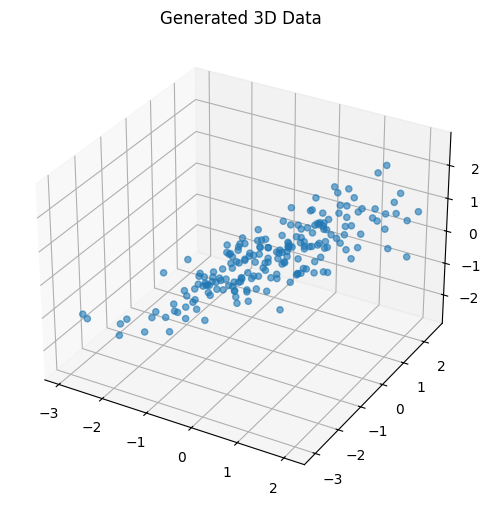

In [121]:
mean = [0, 0, 0]
cov = [[1, 0.9, 0.7], [0.9, 1, 0.4], [0.7, 0.4, 1]]  # Covariance matrix to add some correlation
data = np.random.multivariate_normal(mean, cov, size=200)


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], alpha=0.6)
ax.set_title("Generated 3D Data")
plt.show()

# PCA means finding a new basis P on existing Data X: PX = Y
![](./images/basis.png)

# But what is the best P
- The best P is such that in the new dimensational data, there is zero redundancy 
=> Any two features in the new basis are NOT correlated
=> Off diagonal terms in Covariance matrix of Y is zero.
=> Cy is a diagonal matrix


![](./images/cy.png)

In [122]:
# each row is a dimension, each column is a sample/obs
X = np.transpose(data)

In [123]:
# take mean of all points in each direction
mean_vec = np.mean(X, axis=1).reshape(3,1)
X_sub_mean = X - mean_vec
Cx  = X_sub_mean @ np.transpose(X_sub_mean)

# We utilize an important theorem:
Every Symmetric matrix can be written as product of E D E_transpose, where D is a diagonal matrix, E is a matrix where columns are eigen vectors of the Symmetric matrix. So we start to decompose Cx.

But we also want Cy to be a diagonal matrix, that will happen if the "P" matrix is "E_transpose" matrix
That means, P(the NEW principal directions) is matrix with columns being eigen vectors of Cx.

Also, this eigen vectors(columns of E) are orthonormal. So, if P P_tranpose = I, then P has to have orthonormal vectors.

So, essentially, PCA is finding directions which are orthogonal and maximize variance(minimize redundancy)

![](./images/cyd.png)

In [124]:
eigen_vals, eigen_vecs = np.linalg.eig(Cx)
print('Eigen values ', eigen_vals)
print('Eigen vecs ', eigen_vecs)


Eigen values  [446.10403848   5.58496813 112.51116028]
Eigen vecs  [[ 0.63751717  0.76277514 -0.10837875]
 [ 0.56985245 -0.56152136 -0.59996829]
 [ 0.51849787 -0.32073019  0.79264879]]


In [125]:
print(np.degrees(np.arccos(np.dot(eigen_vecs[:,1], eigen_vecs[:,2]))))
print(np.degrees(np.arccos(np.dot(eigen_vecs[:,1], eigen_vecs[:,0]))))
print(np.degrees(np.arccos(np.dot(eigen_vecs[:,0], eigen_vecs[:,2]))))


90.0
90.00000000000003
90.00000000000001


In [126]:
idx = np.flip(np.argsort(eigen_vals)) # flip for descending order

# sorting such that highest variance capturing dimension(highest eigen val) is the beginning
sorted_eigen_vals = eigen_vals[idx]
sorted_eigen_vectors = eigen_vecs[:, idx]
sorted_eigen_vectors, sorted_eigen_vals

(array([[ 0.63751717, -0.10837875,  0.76277514],
        [ 0.56985245, -0.59996829, -0.56152136],
        [ 0.51849787,  0.79264879, -0.32073019]]),
 array([446.10403848, 112.51116028,   5.58496813]))

In [127]:
# how much variance capture
for i in range(3):
    print('Variance explained = ',  100*sorted_eigen_vals[i]/np.sum(sorted_eigen_vals))

Variance explained =  79.06839888695643
Variance explained =  19.94170985462036
Variance explained =  0.9898912584231909


In [128]:
# P is E_transpose
P = np.transpose(sorted_eigen_vectors)

In [129]:
# take only first 2 directions(capture 99%) -> first 2 rows
Y = P @ X

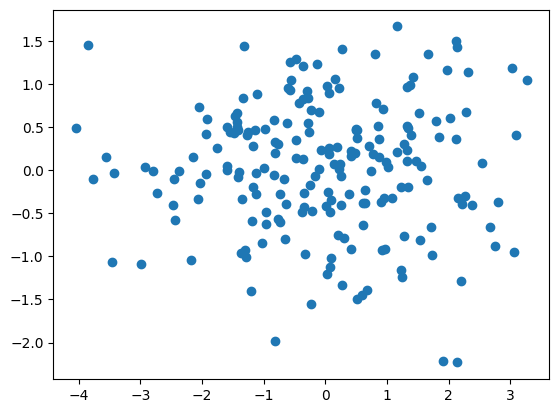

In [130]:
plt.scatter(Y[0,:], Y[1,:])
plt.show()

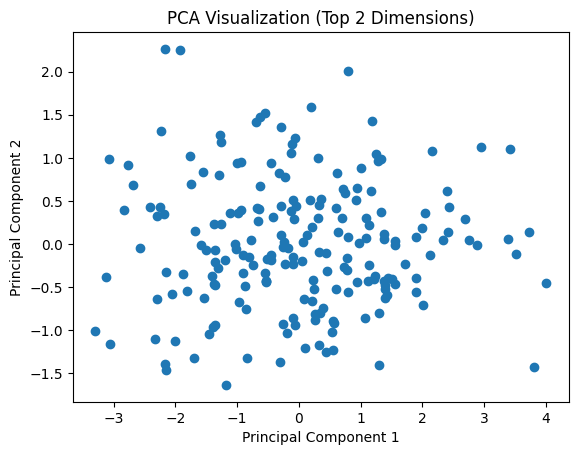

In [138]:
# Check using the library
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.T)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization (Top 2 Dimensions)')
plt.show()

In [141]:
pca.components_

array([[-0.63751717, -0.56985245, -0.51849787],
       [ 0.10837875,  0.59996829, -0.79264879],
       [ 0.76277514, -0.56152136, -0.32073019]])

In [143]:
P

array([[ 0.63751717,  0.56985245,  0.51849787],
       [-0.10837875, -0.59996829,  0.79264879],
       [ 0.76277514, -0.56152136, -0.32073019]])

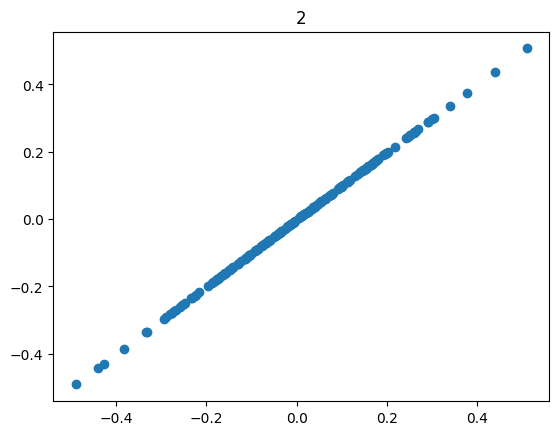

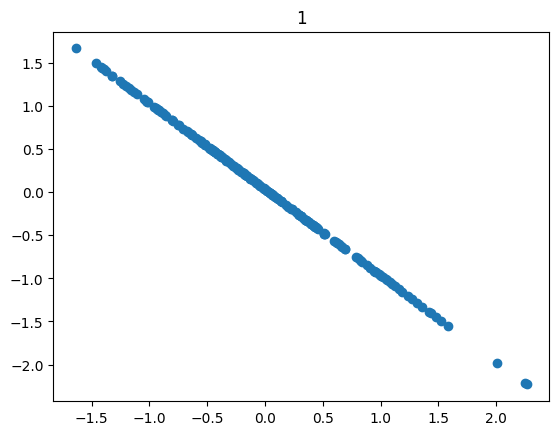

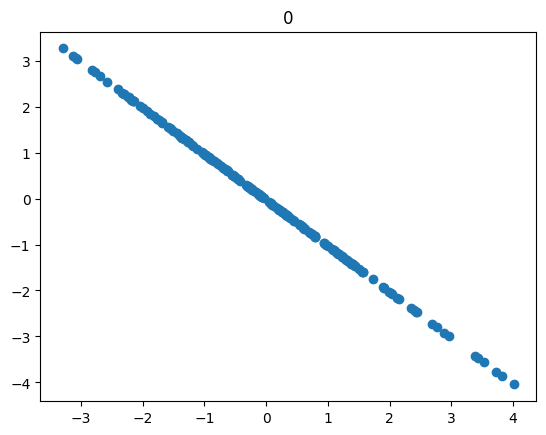

In [145]:
plt.scatter(X_pca[:,2], Y[2,:]); plt.title('2')
plt.show()
plt.scatter(X_pca[:,1], Y[1,:]); plt.title('1')
plt.show()
plt.scatter(X_pca[:,0], Y[0,:]); plt.title('0')
plt.show()




# Interesting:
Note that the first 2 components are "minus" of my method and scikit lib method. That is because the eigen vectors are also minus of each other. The difference occured due to difference in decomposition methods. I used eigen vectors. Scikit learn uses *the LAPACK implementation of the full SVD ...*.. But ultimately the variance captured is same.

(more from GPT)
The direction may be opposite, but it doesn't change the interpretation of the PCA results in terms of captured variance. Here's why:

1. **Eigenvectors Point in a Direction**: Eigenvectors of a covariance matrix indicate a direction in the feature space along which the variance is maximized. Whether the vector points in one direction or directly opposite doesn't matter because it's the line that the vector lies on that's important, not the arrowhead of the vector.

2. **Magnitude of Eigenvalues**: The eigenvalues represent the magnitude of variance captured along the directions indicated by their corresponding eigenvectors. The eigenvalue associated with each eigenvector remains the same regardless of the eigenvector's direction.

3. **Orthogonality**: In PCA, the principal components are orthogonal to each other, which means they are at 90-degree angles to each other. This property is not affected by the sign of the eigenvectors.

4. **Projections**: When you project data onto the eigenvectors (principal components), the sign will determine whether the projections are positive or negative along that axis. However, the relative positions and distances between the projected data points remain unchanged. It's like looking at the same object from two opposite sides; the object itself doesn't change, only your perspective.

Therefore, in the context of PCA, a pair of eigenvectors that are negatives of each other are considered equivalent. If you need consistency for interpretation or further analysis, you can simply multiply an eigenvector by -1 to align all your eigenvectors in a preferred direction.